# Group 1

Fabio Ceruti- Fabio Martino - Alex Lucchini - Jacopo Biggiogera

This notebook contains the code that we used to run our custom made CNN architecture. There are also some commented out architectures we experimented with but did not report in the running since they performed worst than the one we ended up using

In [1]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import defaultdict
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.image import resize_with_pad, ResizeMethod
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from random import shuffle
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tqdm import tqdm
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

# Defining the model

In [2]:
# Class architecture
#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu',
#                        input_shape=(300, 300, 3)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Flatten())
#model.add(layers.Dense(100, activation='relu'))
#model.add(layers.Dense(12, activation='sigmoid'))

In [ ]:
# Trial 1: 
#model = models.Sequential()
#model.add(layers.Conv2D(16, (3, 3), activation='relu',
 #                       input_shape=(350, 350, 3)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((3, 3)))
#model.add(layers.Flatten())
#model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dropout(0.3))
#model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dropout(0.3))
#model.add(layers.Dense(12, activation='sigmoid'))

In [17]:
#Trial: 2
#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu',
#                        input_shape=(350, 350, 3)))
#model.add(layers.AveragePooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.AveragePooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.AveragePooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.AveragePooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.AveragePooling2D((3, 3)))
#model.add(layers.Flatten())
#model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dense(12, activation='softmax'))

In [2]:
# Trial 3:  
#model = models.Sequential()
#model.add(layers.Conv2D(16, (3, 3), activation='relu',
#                        input_shape=(350, 350, 3)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.GlobalAveragePooling2D())
#model.add(layers.Dropout(0.3))
#model.add(layers.Dense(12, activation='softmax'))

In [2]:
#Best performing custom made architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(350, 350, 3)))
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(12, activation='softmax'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 32)      896       
                                                                 
 average_pooling2d (AverageP  (None, 174, 174, 32)     0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 172, 172, 64)      18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 86, 86, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 84, 84, 128)       73856     
                                                                 
 average_pooling2d_2 (Averag  (None, 42, 42, 128)      0

# Using flow from dataframe

In [5]:
#Importing data
paths=pd.read_csv('train_val_data.csv')
paths['label']=paths['label'].astype('str')
X_train, X_val, y_train, y_val = train_test_split(paths['path'],paths['label'], test_size=0.176, stratify=paths['label'])
train_df = pd.DataFrame({'path':X_train, 'label':y_train}).reset_index(drop=True)
valid_df = pd.DataFrame({'path':X_val, 'label':y_val}).reset_index(drop=True)

In [6]:
def togpu(img):
    '''This function uploads the picture to the GPU'''
    with tf.device('/gpu:0'):
        tens_data = tf.constant(img)
    return tens_data

In [7]:
# Setting up the generators.
#NOTE: we have two generators like we do in all our model since often pcitures for the train and validation are
# taken from two dataframes which might have different piture paths (ex. train pictures come from a folder with
#masked pictures whole validation comes form a folder with complete pictures)

train_datagen=ImageDataGenerator(rescale=1./255,preprocessing_function = togpu, #check that you can make multiple functions and pass them in a list
                                 rotation_range=90, brightness_range=[0.1, 2], shear_range=90, zoom_range=[1, 2])

val_datagen=ImageDataGenerator(rescale=1./255,preprocessing_function = togpu)

batch_s = 20


train_generator=train_datagen.flow_from_dataframe(
    train_df, 
    x_col = 'path',
    y_col = 'label',
    class_mode = 'categorical',
    #color_mode='grayscale',#for black and white use: 'grayscale'
    target_size=(350,350),
    batch_size=batch_s
)

validation_generator=val_datagen.flow_from_dataframe(
   valid_df, 
    x_col = 'path',
    y_col = 'label',
    class_mode = 'categorical',
    #color_mode='grayscale',#for black and white use: 'grayscale'
    target_size=(350,350),
    batch_size=batch_s,
    shuffle=False
)

Found 11967 validated image filenames belonging to 12 classes.
Found 2557 validated image filenames belonging to 12 classes.


In [8]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']) 

In [9]:
earlystop = EarlyStopping(monitor='val_accuracy',
                        min_delta=0.01,
                        patience=3,
                        verbose=1,
                        mode='auto')

csv_logger=CSVLogger('model_logs/training_vanilla.log',separator=",",append=False)

In [10]:
stepepoch = 11967/batch_s
valsteps = 2557/batch_s
history=model.fit(train_generator,
          steps_per_epoch=stepepoch, # this is for the training images

          epochs=10, 

          validation_data=validation_generator,
          validation_steps=valsteps,
        callbacks=[earlystop, csv_logger])

Epoch 1/10
598/598 [==============================] - 579s 959ms/step - loss: 2.3371 - accuracy: 0.1919 - val_loss: 2.2743 - val_accuracy: 0.2038
Epoch 2/10
598/598 [==============================] - 562s 940ms/step - loss: 2.2537 - accuracy: 0.2328 - val_loss: 2.1378 - val_accuracy: 0.2820
Epoch 3/10
598/598 [==============================] - 559s 933ms/step - loss: 2.1926 - accuracy: 0.2625 - val_loss: 2.1313 - val_accuracy: 0.2808
Epoch 4/10
598/598 [==============================] - 564s 943ms/step - loss: 2.1387 - accuracy: 0.2831 - val_loss: 2.1013 - val_accuracy: 0.3238
Epoch 5/10
598/598 [==============================] - 563s 940ms/step - loss: 2.0844 - accuracy: 0.3071 - val_loss: 1.9468 - val_accuracy: 0.3504
Epoch 6/10
598/598 [==============================] - 562s 939ms/step - loss: 2.0493 - accuracy: 0.3159 - val_loss: 1.9284 - val_accuracy: 0.3547
Epoch 7/10
598/598 [==============================] - 562s 939ms/step - loss: 2.0129 - accuracy: 0.3302 - val_loss: 2.0937 -

## Saving results on Validation set

In [11]:
from sklearn.metrics import classification_report
from tqdm import tqdm
prediction_classes = np.array([])
true_classes =  np.array([])
step = 0
for x, y in tqdm(validation_generator):
    prediction_classes = np.concatenate([prediction_classes,
                       np.argmax(model.predict(x, verbose=0), axis = -1)])
    true_classes = np.concatenate([true_classes, np.argmax(y, axis=-1)])
    step+=1
    if step == 128:
        break

 99%|█████████▉| 127/128 [00:51<00:00,  2.45it/s]


In [12]:
valid_df['predicted_label_vanilla']=prediction_classes
valid_df.to_csv('val_results/vanilla_resultsval.csv', index=False)

## Saving the model

In [13]:
model.save('saved_models/model_vanilla')
model.save('saved_models/model_vanilla.h5')

INFO:tensorflow:Assets written to: saved_models/model_vanilla/assets


INFO:tensorflow:Assets written to: saved_models/model_vanilla/assets


## Running model on test set and saving results

In [14]:
#loading model
loaded_model = tf.keras.models.load_model('saved_models/model_vanilla')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 32)      896       
                                                                 
 average_pooling2d (AverageP  (None, 174, 174, 32)     0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 172, 172, 64)      18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 86, 86, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 84, 84, 128)       73856     
                                                                 
 average_pooling2d_2 (Averag  (None, 42, 42, 128)      0

In [15]:
test_df = pd.read_csv('test_data.csv')
test_df['label']=test_df['label'].astype('str')
test_df.head()

,path,label
0,Animals/Pandion haliaetus/fdd144a72e5da77cff15...,6
1,Animals/Spinus tristis/e9c56231718b9b11758f5f9...,10
2,Animals/Pachydiplax longipennis/c67ae3e186acb3...,5
3,Animals/Canis latrans/0a922be91bac509ef2bc0a44...,1
4,Animals/Trachemys scripta elegans/fa1dd0961941...,11


In [16]:
def togpu(img):
    with tf.device('/gpu:0'):
        tens_data = tf.constant(img)
    return tens_data

In [17]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen=ImageDataGenerator(rescale=1./255,preprocessing_function = togpu)
batch_s = 20

test_generator=test_datagen.flow_from_dataframe(
   test_df, 
    x_col = 'path',
    y_col = 'label',
    class_mode = 'categorical',
    #color_mode='grayscale',#for black and white use: 'grayscale'
    target_size=(350,350),
    batch_size=batch_s,
    shuffle=False
)

Found 2564 validated image filenames belonging to 12 classes.


In [18]:
loaded_model.evaluate(test_generator)

129/129 [==============================] - 42s 321ms/step - loss: 1.7945 - accuracy: 0.3990


[1.7944910526275635, 0.39898595213890076]

In [19]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    
    return heatmap.numpy()

In [21]:
#Saving heatmaps and predicted labels
prediction_classes_test = np.array([])
true_classes_test =  np.array([])
heatmaps = []

img_size = (350,350)
last_conv_layer_name = "conv2d_4"
step = 0
for x, y in tqdm(test_generator):
    prediction_classes_test = np.concatenate([prediction_classes_test,
                       np.argmax(loaded_model.predict(x, verbose=0), axis = -1)])
    true_classes_test = np.concatenate([true_classes_test, np.argmax(y, axis=-1)])
    for ar in x:
        heatmap = make_gradcam_heatmap(np.expand_dims(ar, axis=0), loaded_model,last_conv_layer_name )
        heatmaps.append(heatmap)
    step+=1
    if step == 129:
        break

 99%|█████████▉| 128/129 [01:56<00:00,  1.10it/s]


In [22]:
inverse_label_enc = {v:k for k,v in test_generator.class_indices.items()}
t = [inverse_label_enc[i] for i in prediction_classes_test]
test_df['predicted_label'] = t
test_df['heatmap'] = heatmaps

In [23]:
from sklearn.metrics import classification_report
print(classification_report(test_df['label'],test_df['predicted_label'] ))

              precision    recall  f1-score   support

           0       0.11      0.05      0.07       193
           1       0.08      0.09      0.09       199
          10       0.08      0.05      0.06       199
          11       0.08      0.05      0.06       206
           2       0.00      0.00      0.00       146
           3       0.08      0.04      0.05       194
           4       0.08      0.12      0.10       216
           5       0.07      0.04      0.05       239
           6       0.13      0.17      0.15       274
           7       0.07      0.10      0.08       228
           8       0.10      0.23      0.14       222
           9       0.10      0.11      0.11       248

    accuracy                           0.09      2564
   macro avg       0.08      0.09      0.08      2564
weighted avg       0.09      0.09      0.08      2564



In [24]:
test_df.head()

,path,label,predicted_label,heatmap
0,Animals/Pandion haliaetus/fdd144a72e5da77cff15...,6,4,"[[0.044346012, 0.10787679, 0.17833649, 0.16570..."
1,Animals/Spinus tristis/e9c56231718b9b11758f5f9...,10,8,"[[0.481168, 0.50562626, 0.69210017, 0.76322067..."
2,Animals/Pachydiplax longipennis/c67ae3e186acb3...,5,4,"[[0.0034747755, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Animals/Canis latrans/0a922be91bac509ef2bc0a44...,1,5,"[[0.17211114, 0.20904641, 0.24697073, 0.297363..."
4,Animals/Trachemys scripta elegans/fa1dd0961941...,11,1,"[[0.0, 0.2690757, 0.30582666, 0.41610038, 0.43..."


In [25]:
import pickle
#Saving as pcikle to maintain data types
with open('test_results/custom_vanilla_testresults.pickle', 'wb') as file:
    pickle.dump(test_df, file)

In [26]:
with open('test_results/custom_vanilla_testresults.pickle', "rb") as f:
    state = pickle.load(f)

In [27]:
state.head()

,path,label,predicted_label,heatmap
0,Animals/Pandion haliaetus/fdd144a72e5da77cff15...,6,4,"[[0.044346012, 0.10787679, 0.17833649, 0.16570..."
1,Animals/Spinus tristis/e9c56231718b9b11758f5f9...,10,8,"[[0.481168, 0.50562626, 0.69210017, 0.76322067..."
2,Animals/Pachydiplax longipennis/c67ae3e186acb3...,5,4,"[[0.0034747755, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Animals/Canis latrans/0a922be91bac509ef2bc0a44...,1,5,"[[0.17211114, 0.20904641, 0.24697073, 0.297363..."
4,Animals/Trachemys scripta elegans/fa1dd0961941...,11,1,"[[0.0, 0.2690757, 0.30582666, 0.41610038, 0.43..."


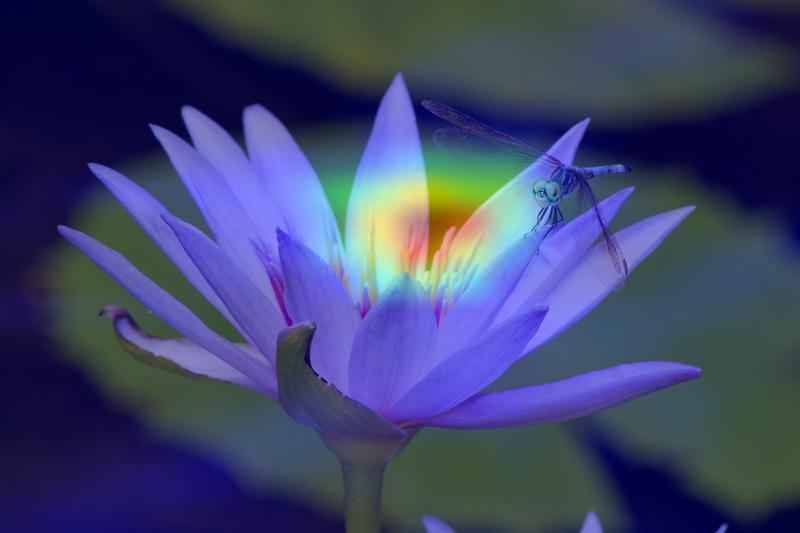

In [28]:
import matplotlib.cm as cm
from IPython.display import Image, display
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.8):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(state['path'][2],state['heatmap'][2])